In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, average_precision_score
from sklearn.model_selection import train_test_split

import datetime

# **Dataset Mount**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Thesis DOCS

/content/drive/MyDrive/Thesis DOCS


In [ ]:
%ls

ev.csv  model.ipynb  old-ev2.csv  old-ev.csv  validation.csv


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Thesis DOCS/ev.csv')
valid = pd.read_csv('/content/drive/My Drive/Thesis DOCS/validation.csv')

In [ ]:
print(df)

      Voltage  Current  Temperature  Charge Capacity  Internal Resistance  \
0        3.65      5.2           23               85                0.012   
1        3.80      4.9           30               90                0.013   
2        3.95      5.1           35               75                0.015   
3        4.05      3.8           25               88                0.011   
4        3.70      4.5           27               95                0.010   
...       ...      ...          ...              ...                  ...   
1680     3.85      4.9           29               86                0.015   
1681     3.75      5.1           31               86                0.012   
1682     3.90      5.0           28               85                0.013   
1683     3.80      4.8           32               89                0.014   
1684     4.05      5.0           29               87                0.015   

      Age in Cycles  State of Charge  Discharge Time  Charge Time  Fault  


In [ ]:
print(valid)

     Voltage  Current  Temperature  Charge Capacity  Internal Resistance  \
0       3.70      4.9           29               90                0.015   
1       3.85      5.0           32               83                0.014   
2       3.95      4.7           30               77                0.012   
3       4.00      5.1           28               89                0.011   
4       3.75      4.6           33               84                0.013   
..       ...      ...          ...              ...                  ...   
194     4.00      5.2           31               90                0.011   
195     3.70      4.9           28               87                0.012   
196     3.95      5.0           33               85                0.013   
197     4.00      5.1           29               88                0.014   
198     3.75      4.7           30               86                0.015   

     Age in Cycles  State of Charge  Discharge Time  Charge Time  Fault  
0            

In [ ]:
x = df.drop('Fault', axis=1)
y = df['Fault']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
X_valid = valid.drop('Fault', axis=1)
y_valid = valid['Fault']


In [ ]:
print(X_test)

      Voltage  Current  Temperature  Charge Capacity  Internal Resistance  \
1115     4.00      5.2           33               89                0.013   
1481     4.00      5.2           30               89                0.014   
36       3.85      5.4           29               91                0.017   
450      3.80      5.1           28               88                0.011   
1396     4.05      5.0           30               88                0.014   
...       ...      ...          ...              ...                  ...   
1057     3.95      5.1           29               65                0.015   
558      3.70      4.5           35               88                0.010   
334      4.05      3.6           20               89                0.014   
463      4.05      3.8           34               78                0.011   
486      3.90      6.0           25               74                0.018   

      Age in Cycles  State of Charge  Discharge Time  Charge Time  
1115   

In [ ]:
print(X_valid)

     Voltage  Current  Temperature  Charge Capacity  Internal Resistance  \
0       3.70      4.9           29               90                0.015   
1       3.85      5.0           32               83                0.014   
2       3.95      4.7           30               77                0.012   
3       4.00      5.1           28               89                0.011   
4       3.75      4.6           33               84                0.013   
..       ...      ...          ...              ...                  ...   
194     4.00      5.2           31               90                0.011   
195     3.70      4.9           28               87                0.012   
196     3.95      5.0           33               85                0.013   
197     4.00      5.1           29               88                0.014   
198     3.75      4.7           30               86                0.015   

     Age in Cycles  State of Charge  Discharge Time  Charge Time  
0                1  

# **Model 1: Random Forest Regressor**



In [ ]:
model= RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
s#Accuracy on Validation SET

y_pred_valid = model.predict(X_valid)

y_pred_valid_binary = [round(value) for value in y_pred_valid]
accuracy = accuracy_score(y_valid, y_pred_valid_binary) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 64.82412060301507 %


In [ ]:
y_pred_binary = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary) * 100
precision= precision_score(y_test, y_pred_binary) * 100
recall= recall_score(y_test, y_pred_binary) * 100
f1= f1_score(y_test, y_pred_binary) * 100
avg_precision = average_precision_score(y_test, y_pred_binary) * 100
print("Accuracy:", accuracy, "%")
print("Precision:", precision, "%")
print("Recall:", recall, "%")
print("F1 Score:", f1, "%")
print("Average Precision:", avg_precision, "%")

Accuracy: 94.65875370919882 %
Precision: 93.33333333333333 %
Recall: 89.90825688073394 %
F1 Score: 91.58878504672897 %
Average Precision: 87.17846804417464 %


In [ ]:
cm= confusion_matrix(y_test, y_pred_binary)
print(cm)

[[221   7]
 [ 11  98]]


In [ ]:
res_df = X_test
res_df['Predicted_Winner'] = y_pred
res_df['True_Winner'] = y_test

res_df['Correct_Prediction'] = (res_df['Predicted_Winner'] == res_df['True_Winner']).astype(int)
res_df[['Predicted_Winner', 'True_Winner', 'Correct_Prediction']].head(10)

,Predicted_Winner,True_Winner,Correct_Prediction
1115,0.45,0,0
1481,0.07,0,0
36,0.04,0,0
450,0.00,0,1
1396,0.26,0,0
244,0.00,0,1
744,0.00,0,1
739,1.00,1,1
339,0.00,0,1
817,0.00,0,1


<Axes: xlabel='Predicted', ylabel='Correct_Prediction'>

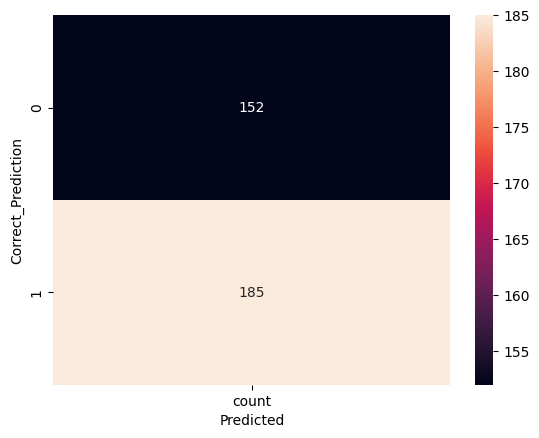

In [ ]:
# Create contingency table
ctab = pd.crosstab(index=res_df['Correct_Prediction'], colnames=['Predicted'], columns='count')

# Plot heatmap
sns.heatmap(ctab, annot=True, fmt='d')

# **Model 2: Decision Tree Regressor**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
dtr_model= DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

y_pred_dtr= dtr_model.predict(X_test)

In [ ]:
y_pred_binary = [round(value) for value in y_pred_dtr]
precision= precision_score(y_test, y_pred_binary) * 100
recall= recall_score(y_test, y_pred_binary) * 100
accuracy = accuracy_score(y_test, y_pred_binary) * 100
f1= f1_score(y_test, y_pred_binary) * 100
avg_precision = average_precision_score(y_test, y_pred_binary) * 100
print("Accuracy:", accuracy, "%")
print("Precision:", precision, "%")
print("Recall:", recall, "%")
print("F1 Score:", f1, "%")
print("Average Precision:", avg_precision, "%")

Accuracy: 93.76854599406528 %
Precision: 89.28571428571429 %
Recall: 91.74311926605505 %
F1 Score: 90.49773755656108 %
Average Precision: 84.58412249009261 %


In [ ]:
cm= confusion_matrix(y_test, y_pred_binary)
print(cm)

[[216  12]
 [  9 100]]


In [ ]:
res_df_dtr = X_test
res_df_dtr['Predicted_Winner'] = y_pred_dtr
res_df_dtr['True_Winner'] = y_test

res_df_dtr['Correct_Prediction'] = (res_df_dtr['Predicted_Winner'] == res_df_dtr['True_Winner']).astype(int)
res_df_dtr[['Predicted_Winner', 'True_Winner', 'Correct_Prediction']].head(10)

,Predicted_Winner,True_Winner,Correct_Prediction
1115,0.0,0,1
1481,0.0,0,1
36,0.0,0,1
450,0.0,0,1
1396,1.0,0,0
244,0.0,0,1
744,0.0,0,1
739,1.0,1,1
339,0.0,0,1
817,0.0,0,1


<Axes: xlabel='Predicted', ylabel='Correct_Prediction'>

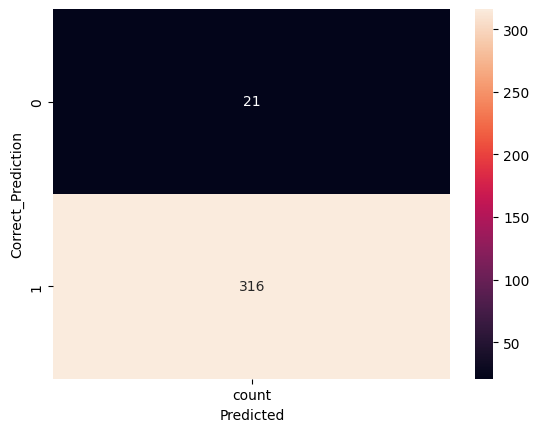

In [ ]:
# Create contingency table
ctab = pd.crosstab(index=res_df_dtr['Correct_Prediction'], colnames=['Predicted'], columns='count')

# Plot heatmap
sns.heatmap(ctab, annot=True, fmt='d')

# **Model 3: Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
log_model= LogisticRegression(random_state=0, max_iter=800).fit(X_train, y_train)

y_pred_log= log_model.predict(X_test)

In [ ]:
y_pred_log_binary = [round(value) for value in y_pred_log]
precision= precision_score(y_test, y_pred_log_binary) * 100
recall= recall_score(y_test, y_pred_log_binary) * 100
accuracy = accuracy_score(y_test, y_pred_log_binary) * 100
f1= f1_score(y_test, y_pred_log_binary) * 100
avg_precision = average_precision_score(y_test, y_pred_log_binary) * 100
print("Accuracy:", accuracy, "%")
print("Precision:", precision, "%")
print("Recall:", recall, "%")
print("F1 Score:", f1, "%")
print("Average Precision:", avg_precision, "%")

Accuracy: 72.70029673590504 %
Precision: 63.934426229508205 %
Recall: 35.77981651376147 %
F1 Score: 45.88235294117647 %
Average Precision: 43.64713374715994 %


In [ ]:
cm= confusion_matrix(y_test, y_pred_log_binary)
print(cm)

[[206  22]
 [ 70  39]]


In [ ]:
res_df_log = X_test
res_df_log['Predicted_Winner'] = y_pred_log
res_df_log['True_Winner'] = y_test

res_df_log['Correct_Prediction'] = (res_df_log['Predicted_Winner'] == res_df_log['True_Winner']).astype(int)
res_df_log[['Predicted_Winner', 'True_Winner', 'Correct_Prediction']].head(10)


,Predicted_Winner,True_Winner,Correct_Prediction
1115,0,0,1
1481,0,0,1
36,0,0,1
450,0,0,1
1396,0,0,1
244,0,0,1
744,0,0,1
739,1,1,1
339,0,0,1
817,0,0,1


<Axes: xlabel='Predicted', ylabel='Correct_Prediction'>

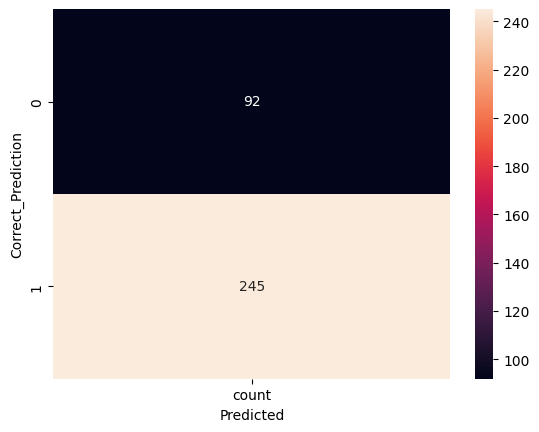

In [ ]:
# Create contingency table
ctab = pd.crosstab(index=res_df_log['Correct_Prediction'], colnames=['Predicted'], columns='count')

# Plot heatmap
sns.heatmap(ctab, annot=True, fmt='d')

# **Model 4: SVM**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

y_pred_SVM = SVM_model.predict(X_test)

In [ ]:
y_pred_SVM_binary = [round(value) for value in y_pred_SVM]
accuracy = accuracy_score(y_test, y_pred_SVM_binary) * 100
avg_precision = average_precision_score(y_test, y_pred_SVM_binary) * 100
print("Accuracy:", accuracy, "%")
print("Average Precision:", avg_precision, "%")

Accuracy: 67.65578635014838 %
Average Precision: 32.34421364985163 %


In [ ]:
res_df_SVM = X_test
res_df_SVM['Predicted_Winner'] = y_pred_SVM
res_df_SVM['True_Winner'] = y_test

res_df_SVM['Correct_Prediction'] = (res_df_SVM['Predicted_Winner'] == res_df_SVM['True_Winner']).astype(int)
res_df_log[['Predicted_Winner', 'True_Winner', 'Correct_Prediction']].head(10)

,Predicted_Winner,True_Winner,Correct_Prediction
1115,0,0,1
1481,0,0,1
36,0,0,1
450,0,0,1
1396,0,0,1
244,0,0,1
744,0,0,1
739,1,1,1
339,0,0,1
817,0,0,1


<Axes: xlabel='Predicted', ylabel='Correct_Prediction'>

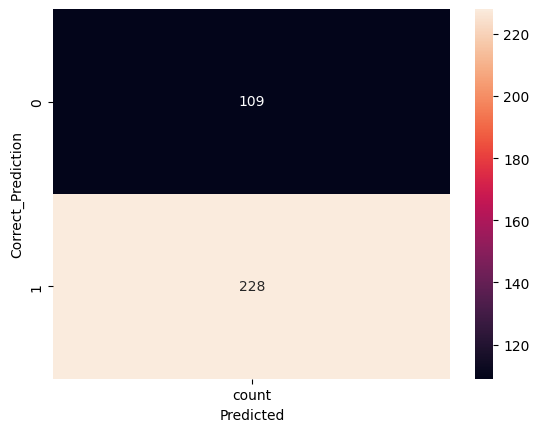

In [ ]:
ctab = pd.crosstab(index=res_df_SVM['Correct_Prediction'], colnames=['Predicted'], columns='count')

# Plot heatmap
sns.heatmap(ctab, annot=True, fmt='d')

# **Model 5: Random Forest Classifier**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
model5= RandomForestClassifier(n_estimators = 100)
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)

In [ ]:
y_pred5_binary = [round(value) for value in y_pred5]
accuracy = accuracy_score(y_test, y_pred5_binary) * 100
precision= precision_score(y_test, y_pred5_binary) * 100
recall= recall_score(y_test, y_pred5_binary) * 100
f1= f1_score(y_test, y_pred5_binary) * 100
avg_precision = average_precision_score(y_test, y_pred5_binary) * 100
print("Accuracy:", accuracy, "%")
print("Precision:", precision, "%")
print("Recall:", recall, "%")
print("F1 Score:", f1, "%")
print("Average Precision:", avg_precision, "%")

Accuracy: 94.65875370919882 %
Precision: 93.33333333333333 %
Recall: 89.90825688073394 %
F1 Score: 91.58878504672897 %
Average Precision: 87.17846804417464 %


In [ ]:
cm= confusion_matrix(y_test, y_pred5)
print(cm)

[[221   7]
 [ 11  98]]


In [ ]:
res_df5 = X_test
res_df5['Predicted_Winner'] = y_pred5
res_df5['True_Winner'] = y_test

res_df5['Correct_Prediction'] = (res_df5['Predicted_Winner'] == res_df5['True_Winner']).astype(int)
res_df5[['Predicted_Winner', 'True_Winner', 'Correct_Prediction']].head(10)

,Predicted_Winner,True_Winner,Correct_Prediction
1115,1,0,0
1481,0,0,1
36,0,0,1
450,0,0,1
1396,0,0,1
244,0,0,1
744,0,0,1
739,1,1,1
339,0,0,1
817,0,0,1


<Axes: xlabel='Predicted', ylabel='Correct_Prediction'>

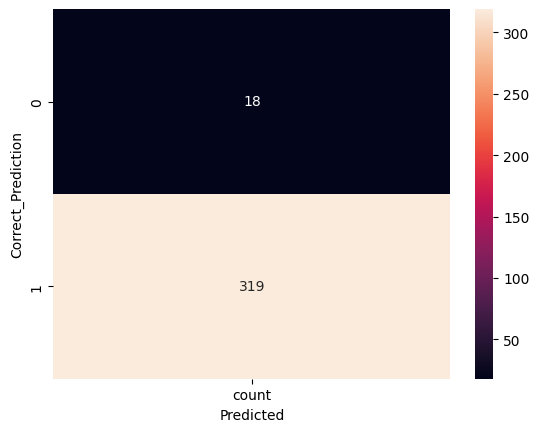

In [ ]:
ctab = pd.crosstab(index=res_df5['Correct_Prediction'], colnames=['Predicted'], columns='count')

# Plot heatmap
sns.heatmap(ctab, annot=True, fmt='d')

In [ ]:
#Accuracy on Validation SET

y_pred_valid = model5.predict(X_valid)

y_pred_valid_binary = [round(value) for value in y_pred_valid]
accuracy = accuracy_score(y_valid, y_pred_valid_binary) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 66.33165829145729 %


# **Model 6: Decision Tree Classifier**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
model6= DecisionTreeClassifier(random_state=0)
model6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)

In [ ]:
y_pred6_binary = [round(value) for value in y_pred6]
accuracy = accuracy_score(y_test, y_pred6_binary) * 100
precision= precision_score(y_test, y_pred6_binary) * 100
recall= recall_score(y_test, y_pred6_binary) * 100
f1= f1_score(y_test, y_pred6_binary) * 100
avg_precision = average_precision_score(y_test, y_pred6_binary) * 100
print("Accuracy:", accuracy, "%")
print("Precision:", precision, "%")
print("Recall:", recall, "%")
print("F1 Score:", f1, "%")
print("Average Precision:", avg_precision, "%")

Accuracy: 92.58160237388724 %
Precision: 88.88888888888889 %
Recall: 88.07339449541286 %
F1 Score: 88.47926267281106 %
Average Precision: 82.14502853927894 %


In [ ]:
cm= confusion_matrix(y_test, y_pred6)
print(cm)

[[216  12]
 [ 13  96]]


In [ ]:
res_df6 = X_test
res_df6['Predicted_Winner'] = y_pred6
res_df6['True_Winner'] = y_test

res_df6['Correct_Prediction'] = (res_df6['Predicted_Winner'] == res_df6['True_Winner']).astype(int)
res_df6[['Predicted_Winner', 'True_Winner', 'Correct_Prediction']].head(10)

,Predicted_Winner,True_Winner,Correct_Prediction
1115,0,0,1
1481,0,0,1
36,0,0,1
450,0,0,1
1396,1,0,0
244,0,0,1
744,0,0,1
739,1,1,1
339,0,0,1
817,0,0,1


<Axes: xlabel='Predicted', ylabel='Correct_Prediction'>

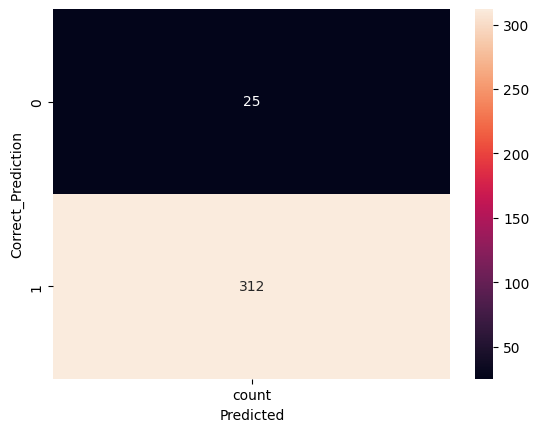

In [ ]:
ctab = pd.crosstab(index=res_df6['Correct_Prediction'], colnames=['Predicted'], columns='count')

# Plot heatmap
sns.heatmap(ctab, annot=True, fmt='d')